In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns 


club_games_df = pd.read_feather('../cleaned_data/club_games.feather')
events_df = pd.read_feather('../cleaned_data/game_events.feather')
games_df = pd.read_feather('../cleaned_data/games.feather')
appearances_df = pd.read_feather('../cleaned_data/appearances.feather')

# Games Stats

Visualizzazioni riguardanti le statistiche delle partite e degli eventi delle partite:
- statistiche delle partite
- statistiche degli eventi delle partite

## Statistiche Partite

Statistiche e visualizzazioni riguardanti le partite, in particolare dati come l'esito delle partite, il numero di goal segnati o l'andamento di goal e altre statistiche nel corso degli anni.

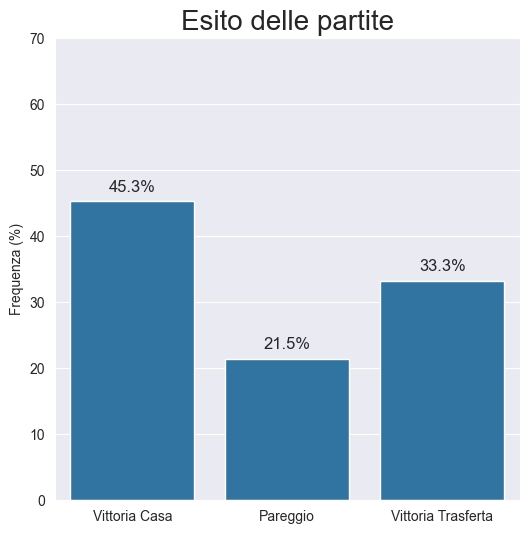

In [2]:
# Esito delle partite: percentuale di vittorie in casa, fuori casa e pareggi

#rimuove duplicati
club_games_df_unique = club_games_df.query('hosting == "Home"')

total_games = len(club_games_df_unique)

home_wins = len(club_games_df_unique.query('is_win == True'))/total_games*100
draws = len(club_games_df_unique.query('club_goals == opponent_goals'))/total_games*100
away_wins = len(club_games_df_unique.query('club_goals < opponent_goals'))/total_games*100

results_percentage_df = pd.DataFrame({
    'result': ['Vittoria Casa', 'Pareggio', 'Vittoria Trasferta'],
    'percentage': [home_wins, draws, away_wins]
})


plt.figure(figsize=(6,6))
ax = sns.barplot(data=results_percentage_df, x='result', y='percentage')

for i, (percentage, result) in enumerate(zip(results_percentage_df['percentage'], results_percentage_df['result'])):
    ax.text(i, percentage + 1, f"{percentage:.1f}%", ha='center', va='bottom', fontsize=12)
    
plt.title('Esito delle partite', fontsize=20)
plt.xlabel('')
plt.ylabel('Frequenza (%)')
plt.ylim(0,70)
plt.show()

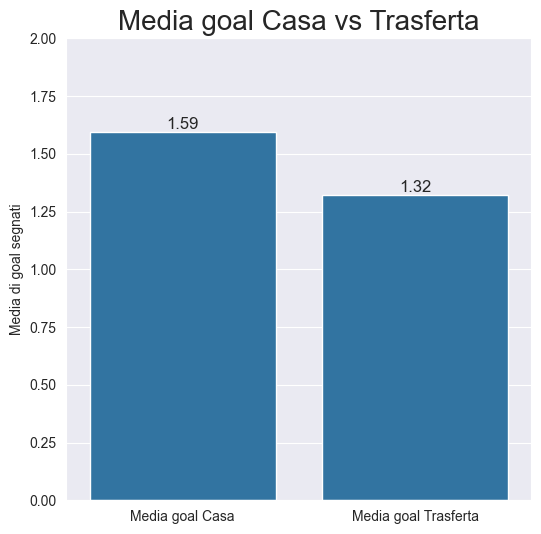

In [3]:
# media di goal casa-trasferta

home_goals = club_games_df_unique['club_goals'].sum()
away_goals = club_games_df_unique['opponent_goals'].sum()

avg_home_goals = home_goals / len(club_games_df_unique)
avg_away_goals = away_goals / len(club_games_df_unique)

avg_goals_df = pd.DataFrame({
    'hosting': ['Media goal Casa', 'Media goal Trasferta'],
    'average': [avg_home_goals, avg_away_goals]
})


plt.figure(figsize=(6,6))
ax = sns.barplot(data=avg_goals_df, x='hosting', y='average')

for index, row in avg_goals_df.iterrows():
    ax.text(index, row['average'], f"{row['average']:.2f}", ha='center', va='bottom', fontsize=12)

plt.title('Media goal Casa vs Trasferta', fontsize=20)
plt.xlabel('')
plt.ylabel('Media di goal segnati')
plt.ylim(0,2)
plt.show()

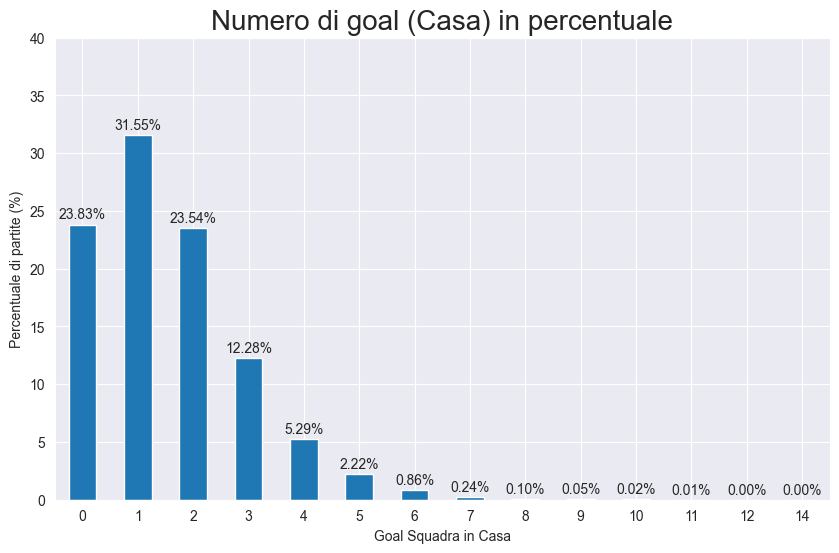

In [4]:
# goal segnati Casa

home_goal_counts = games_df['home_club_goals'].value_counts().sort_index()
total_games = len(games_df)
home_goal_percentages = (home_goal_counts / total_games) * 100


plt.figure(figsize=(10, 6))
ax = home_goal_percentages.plot(kind='bar')

for i, percentage in enumerate(home_goal_percentages):
    ax.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center')

ax.set_title("Numero di goal (Casa) in percentuale", fontsize=20)
plt.xlabel('Goal Squadra in Casa')
plt.ylabel('Percentuale di partite (%)')
plt.xticks(rotation=0)
plt.ylim(0, 40)
plt.show()

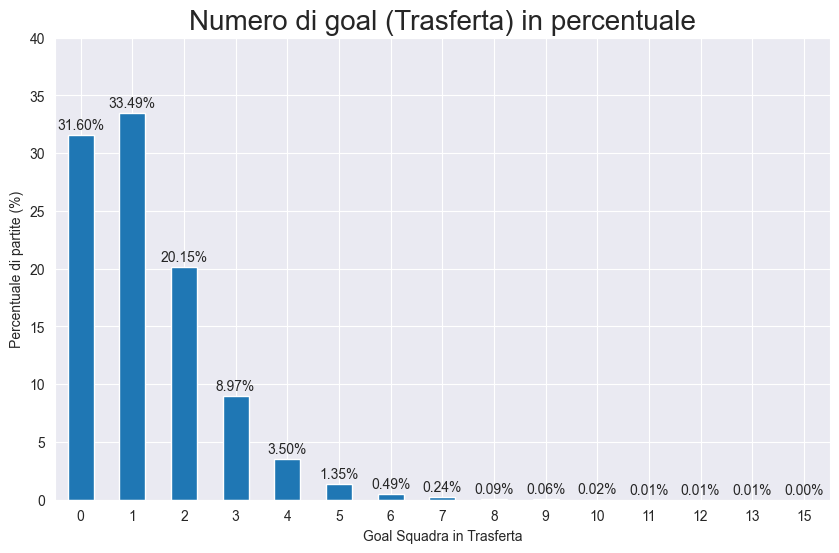

In [5]:
# goal segnati Trasferta

away_goal_counts = games_df['away_club_goals'].value_counts().sort_index()
total_games = len(games_df)
away_goal_percentages = (away_goal_counts / total_games) * 100


plt.figure(figsize=(10, 6))
ax = away_goal_percentages.plot(kind='bar')

for i, percentage in enumerate(away_goal_percentages):
    ax.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center')

ax.set_title("Numero di goal (Trasferta) in percentuale", fontsize=20)
plt.xlabel('Goal Squadra in Trasferta')
plt.ylabel('Percentuale di partite (%)')
plt.xticks(rotation=0)
plt.ylim(0, 40)
plt.show()

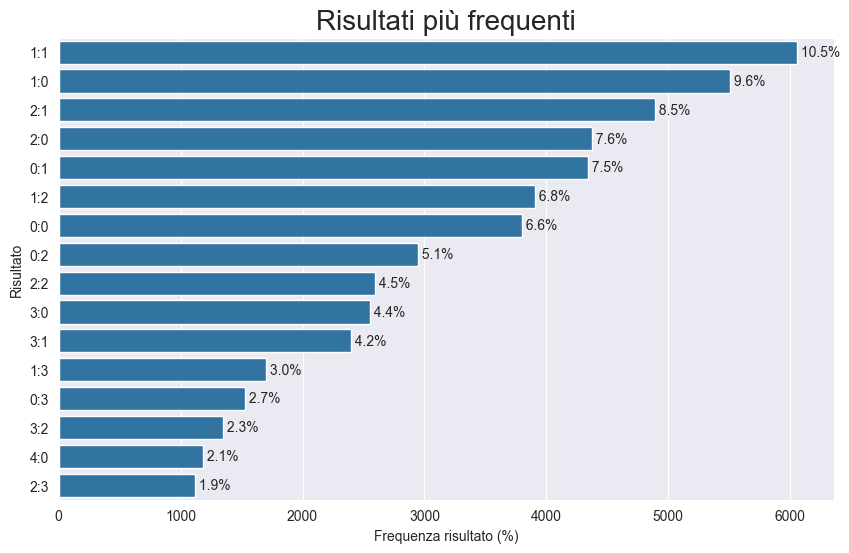

In [6]:
# Risultati più frequenti

game_results = games_df['score'].value_counts().reset_index()
game_results.columns = ['score', 'count']

total_games = len(games_df)
game_results['percentage'] = (game_results['count'] / total_games) * 100

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=game_results.head(16), y='score', x='count', orient='h')

for i, row in game_results.head(16).iterrows():
    ax.text(row['count'], i, f" {row['percentage']:.1f}%", ha='left', va='center', fontsize=10)

plt.title("Risultati più frequenti", fontsize=20)
plt.xlabel('Frequenza risultato (%)')
plt.ylabel('Risultato')
plt.show()

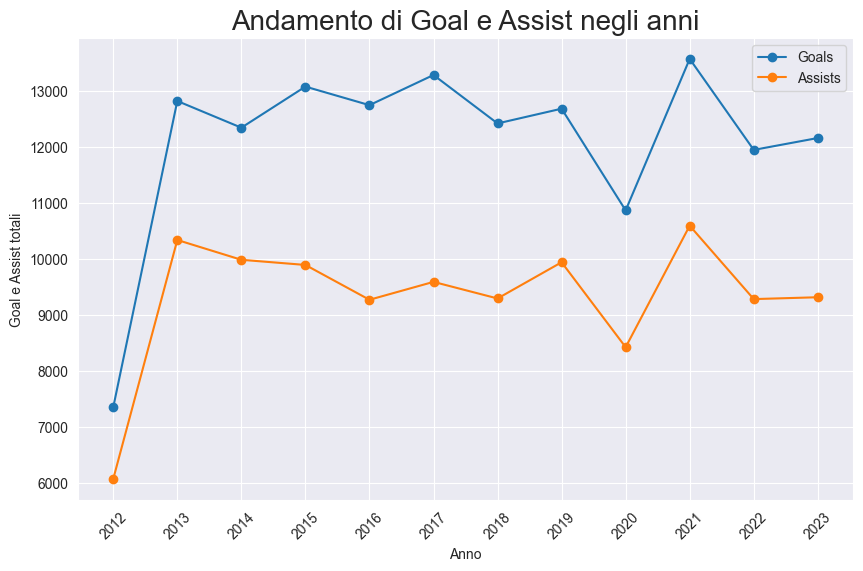

In [7]:
# Andamento di Goal e Assist negli anni

annual_totals = appearances_df.groupby(appearances_df['date'].dt.to_period('Y'))[['goals', 'assists']].sum()

plt.figure(figsize=(10, 6))
plt.plot(annual_totals.index.astype(str), annual_totals['goals'], marker='o', label='Goals')
plt.plot(annual_totals.index.astype(str), annual_totals['assists'], marker='o', label='Assists')

plt.xlabel('Anno')
plt.ylabel('Goal e Assist totali')
plt.title('Andamento di Goal e Assist negli anni', fontsize=20)
plt.legend()
plt.xticks(rotation=45)
plt.show()

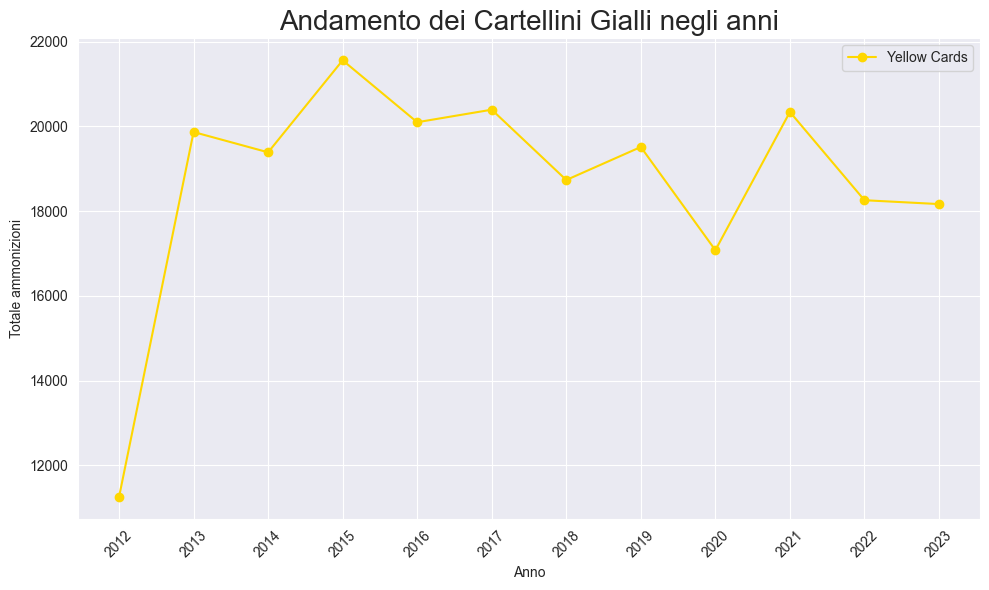

In [8]:
# Andamento dei cartellini gialli negli anni

annual_yellow_cards = appearances_df.groupby(appearances_df['date'].dt.to_period('Y'))['yellow_cards'].sum()

# Plot dei totali annuali di cartellini gialli
plt.figure(figsize=(10, 6))
plt.plot(annual_yellow_cards.index.astype(str), annual_yellow_cards.values, marker='o', label='Yellow Cards', color='gold')

plt.xlabel('Anno')
plt.ylabel('Totale ammonizioni')
plt.title('Andamento dei Cartellini Gialli negli anni', fontsize=20)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

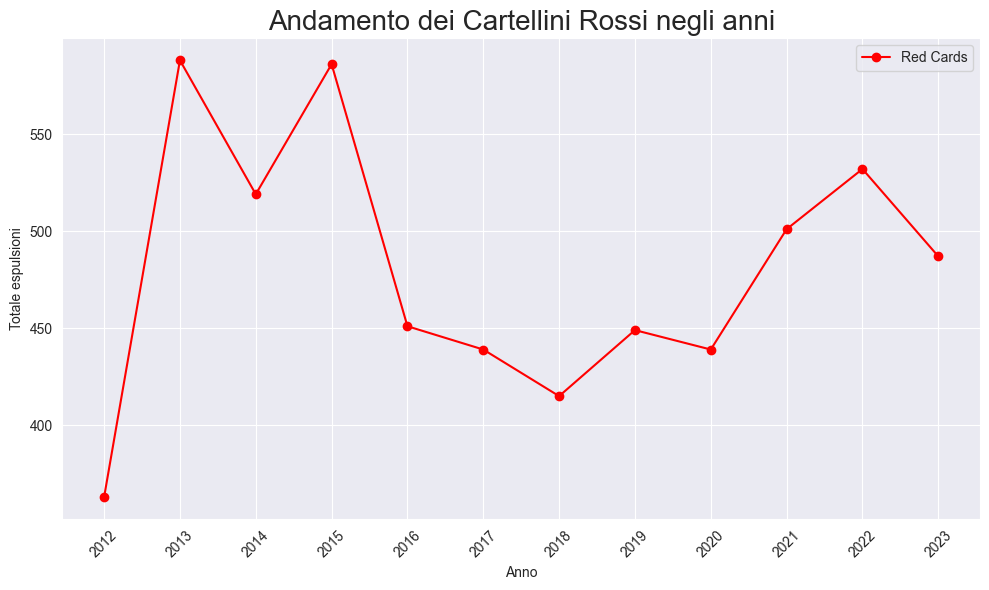

In [9]:
# Andamento dei cartellini rossi negli anni

annual_red_cards = appearances_df.groupby(appearances_df['date'].dt.to_period('Y'))['red_cards'].sum()

# Plot dei totali annuali di cartellini rossi
plt.figure(figsize=(10, 6))
plt.plot(annual_red_cards.index.astype(str), annual_red_cards.values, marker='o', label='Red Cards', color='red')

plt.xlabel('Anno')
plt.ylabel('Totale espulsioni')
plt.title('Andamento dei Cartellini Rossi negli anni', fontsize=20)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Statistiche Eventi delle partite

Statistiche e visualizzazioni relative ai singoli eventi che si sono verificati nel corso delle partite, ovvero sostituzioni, goal e cartellini.

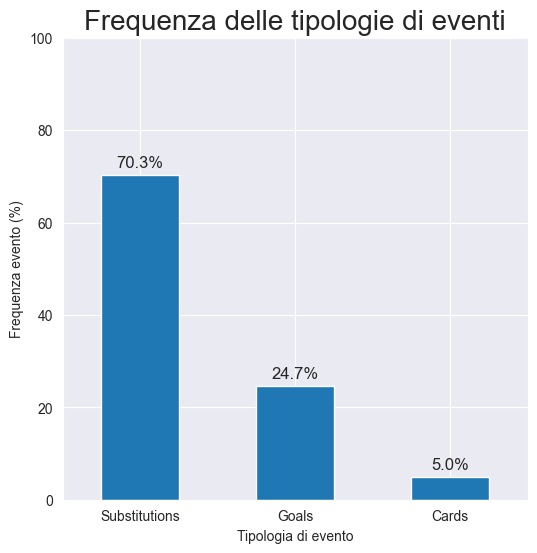

In [10]:
# frequenza delle tipologie di eventi

event_count = events_df['type'].value_counts()
event_percentages = (event_count / len(events_df)) * 100

plt.figure(figsize=(6,6))
ax = event_percentages.plot(kind='bar')

for i, v in enumerate(event_percentages):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom', fontsize=12)

plt.title('Frequenza delle tipologie di eventi', fontsize=20)
plt.ylim(0,100)
plt.ylabel('Frequenza evento (%)')
plt.xlabel('Tipologia di evento')
plt.xticks(rotation=0)
plt.show()

Totale di goal segnati nel primo tempo: 25295
Totale di goal segnati nel secondo tempo: 29487


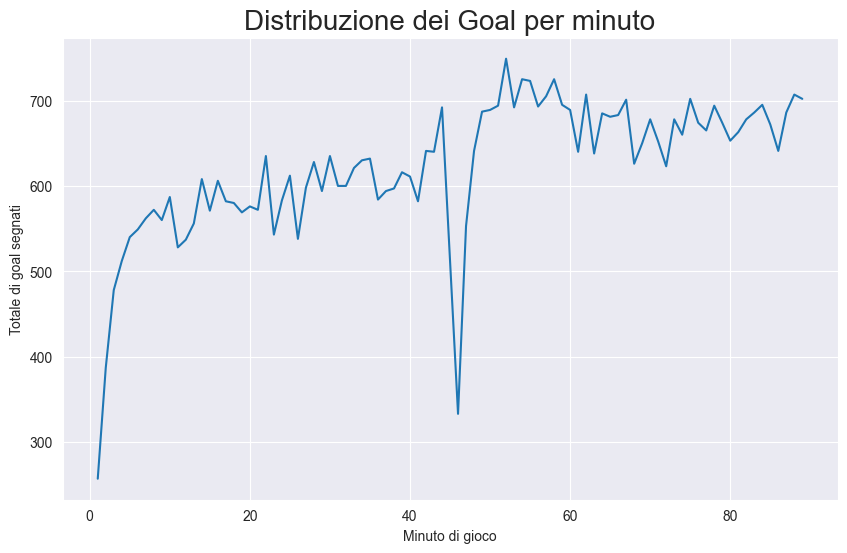

In [11]:
# distribuzione dei gol per minuto di gioco

# togliamo 90 e 45 min perchè comprendono anche i minuti di recupero
goal_events = events_df.query('type == "Goals" and minute<90 and minute!=45')

goal_per_minute = goal_events['minute'].value_counts().sort_index()

first_half_goals = len(goal_events.query('minute <= 45'))
second_half_goals = len(goal_events.query('minute > 45'))

print(f"Totale di goal segnati nel primo tempo: {first_half_goals}")
print(f"Totale di goal segnati nel secondo tempo: {second_half_goals}")

plt.figure(figsize=(10,6))
sns.lineplot(data=goal_per_minute)
plt.title('Distribuzione dei Goal per minuto', fontsize=20)
plt.xlabel('Minuto di gioco')
plt.ylabel('Totale di goal segnati')
plt.show()

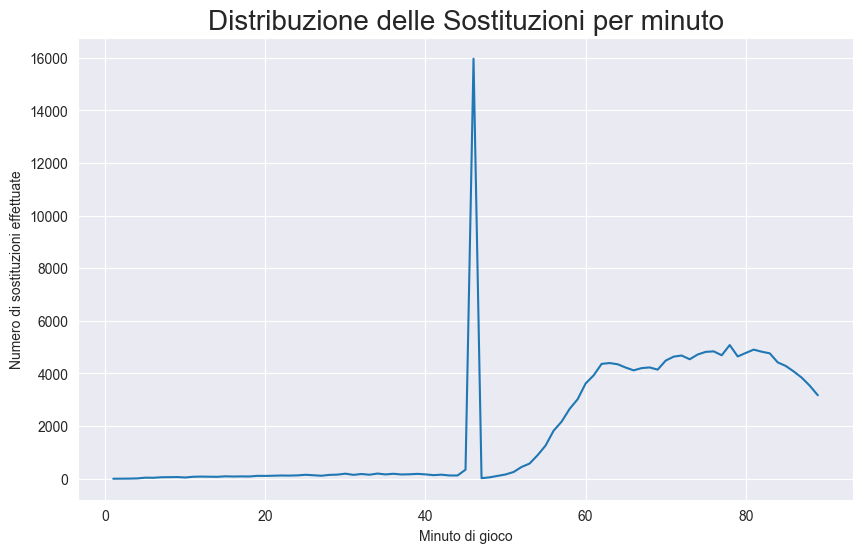

In [12]:
# distribuzione delle sostituzioni per minuto di gioco

# togliamo tempi supplementari (min>=90)
subs_events = events_df.query('type == "Substitutions" and minute<90')

subs_per_minute = subs_events['minute'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=subs_per_minute)
plt.title('Distribuzione delle Sostituzioni per minuto', fontsize=20)
plt.xlabel('Minuto di gioco')
plt.ylabel('Numero di sostituzioni effettuate')
plt.show()

In [38]:
import holoviews as hv
# hv.extension('bokeh')

players_df = pd.read_feather("../cleaned_data/players.feather")


# Filtraggio dei dati per ottenere le coppie assist-goal per il giocatore specifico
goals_df = events_df[
    (events_df['type'] == 'Goals') &  
    (events_df['player_id'] == 342229) & 
    (events_df['player_assist_id'].notna())
].copy()

# Convertire player_assist_id in Int64
goals_df.loc[:,'player_assist_id'] = goals_df['player_assist_id'].astype('Int64')

goals_w_names_df = goals_df.merge(players_df, on= 'player_id', how= 'left')

goals_w_names_df = goals_w_names_df.merge(players_df, left_on='player_assist_id', right_on='player_id', how='left')



# Estrazione delle coppie assist-goal
assist_goal_pairs = goals_w_names_df[['last_name_y', 'last_name_x']].dropna().values.tolist()

# Creazione del DataFrame delle connessioni
connections = pd.DataFrame(assist_goal_pairs, columns=['assist', 'goal'])

# Creazione del grafico a corda
chord = hv.Chord(connections)

# Impostazioni per il grafico
chord.opts(
    cmap='Category20', 
    edge_cmap='Category20', 
    label_index='index', 
    node_color='index', 
    edge_color='assist',
    width=600,    # Imposta la larghezza dell'immagine
    height=600,   # Imposta l'altezza dell'immagine
    title = "Diagramma a corda di tutti gli assist che hanno protato a un goal di Mbappè"
    
)

# Visualizzazione del grafico
hv.save(chord, 'chord_diagram.html')

# Per visualizzare il grafico nel notebook
chord





:Chord   [assist,goal]